 #  Evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

whale_returns_df = pd.read_csv(whale_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

# Check Types
print(whale_returns_df.dtypes)

# Output first 5 rows
whale_returns_df.head()

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

# Check Types
print(algo_returns_df.dtypes)

# Output first 5 rows
algo_returns_df.head()

Algo 1    float64
Algo 2    float64
dtype: object


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_hist_df = pd.read_csv(sp500_history_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_hist_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
print(sp500_hist_df.dtypes)

Close    object
dtype: object


In [10]:
# Rplace $ sign
sp500_hist_df['Close'] = sp500_hist_df['Close'].str.replace('$', '')
# Fix Data Types
sp500_hist_df['Close'] = sp500_hist_df['Close'].astype('float')
print(sp500_hist_df.dtypes)

Close    float64
dtype: object


In [11]:
# Calculate Daily Returns
sp500_returns_df = sp500_hist_df.pct_change()

In [12]:
# Drop nulls
sp500_returns_df.dropna(inplace=True)

In [13]:
sp500_returns_df.head()
# Rename Column
sp500_returns_df.columns = ['SP500']
sp500_returns_df.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
all_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis=1, join='inner')
all_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

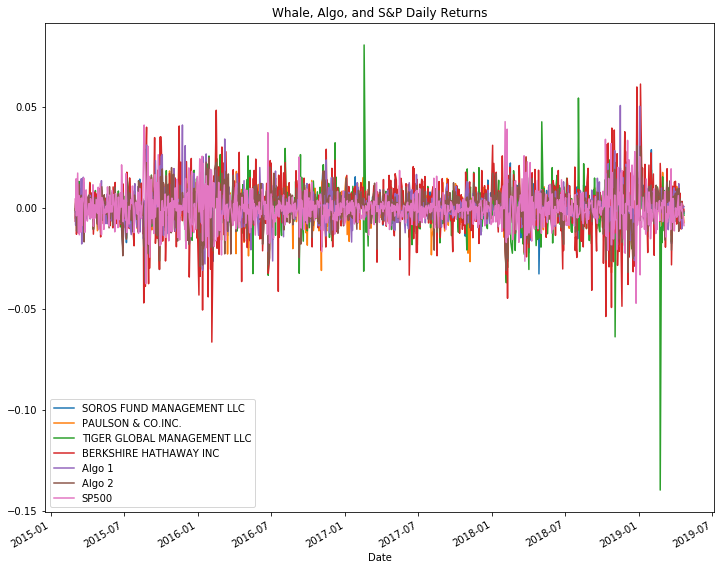

In [15]:
# Plot daily returns
all_returns_df.plot(figsize=(12,10), title='Whale, Algo, and S&P Daily Returns')

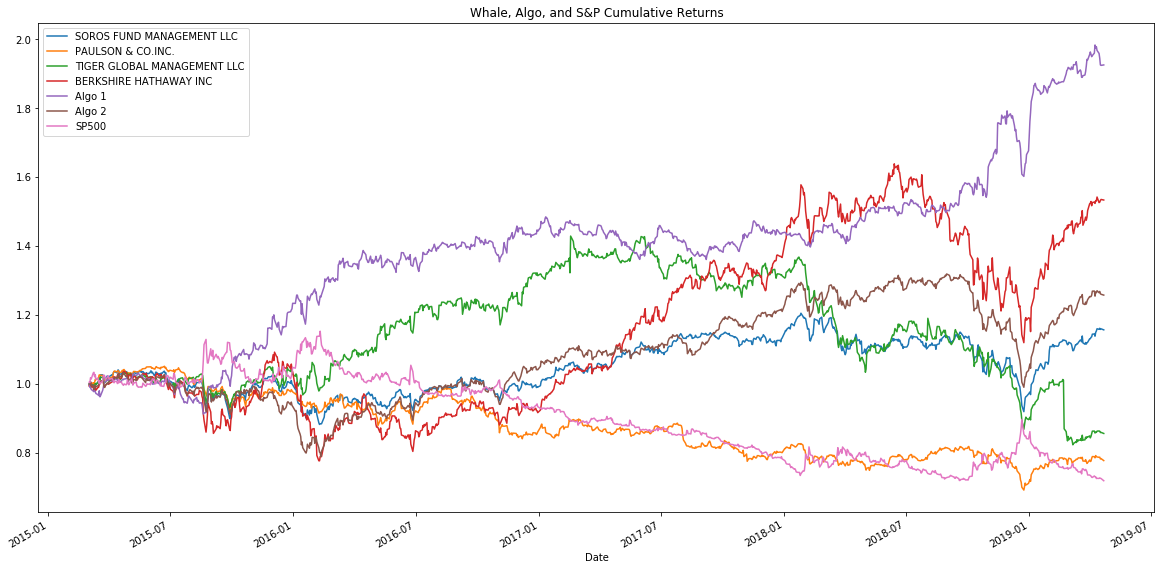

In [16]:
# Plot cumulative returns
cumulative_returns_df = (1 + all_returns_df).cumprod()
cumulative_returns_df.plot(figsize=(20,10), title='Whale, Algo, and S&P Cumulative Returns')

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

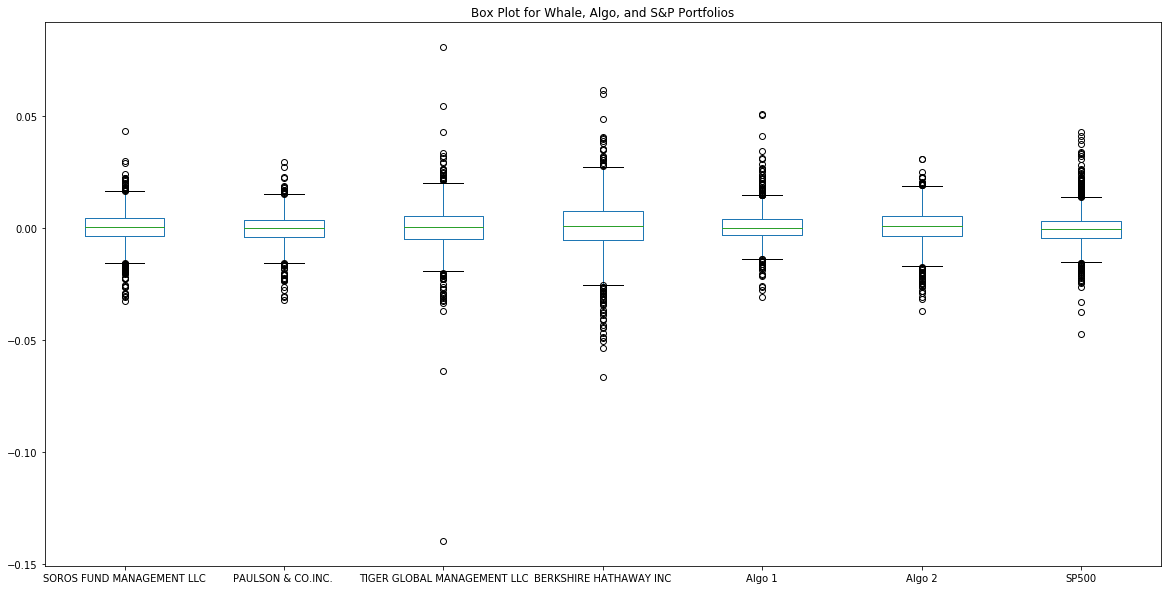

In [17]:
# Box plot to visually show risk
all_returns_df.plot.box(figsize=(20,10), title='Box Plot for Whale, Algo, and S&P Portfolios')

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
all_returns_df.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
# TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than S&P500 based only on standard deviations
all_returns_df.std() > all_returns_df['SP500'].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

In [20]:
# Calculate the annualized standard deviation (252 trading days)
all_returns_df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

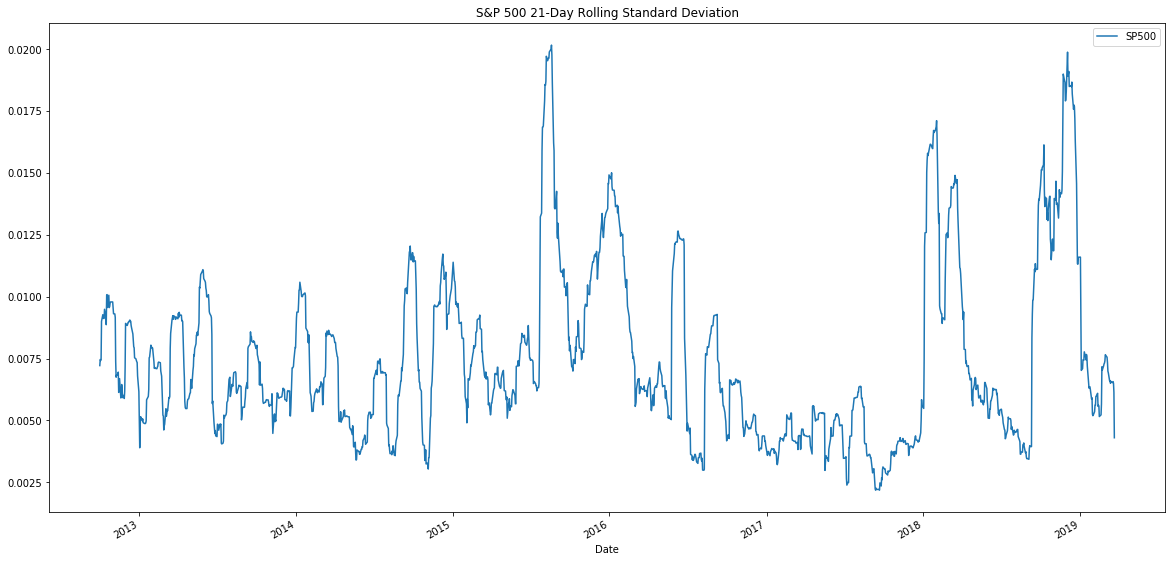

In [21]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_returns_df.rolling(window=21).std().plot(figsize=(20,10), title='S&P 500 21-Day Rolling Standard Deviation')

In [22]:
# Correlation
all_returns_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


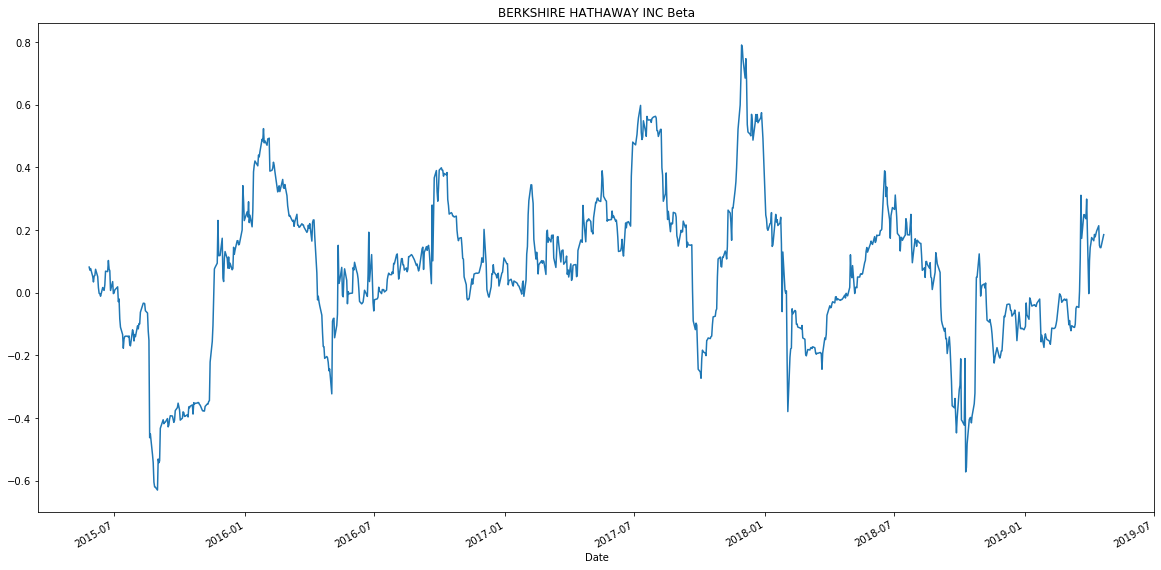

In [23]:
# Calculate 60 day Beta for Berkshire Hathaway Inc compared to the total market (S&P 500)
BH_SP500_cov = all_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_returns_df['SP500'])
SP500_var = all_returns_df['SP500'].rolling(window=60).var()
Beta = BH_SP500_cov / SP500_var
Beta.plot(figsize=(20,10), title='BERKSHIRE HATHAWAY INC Beta')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

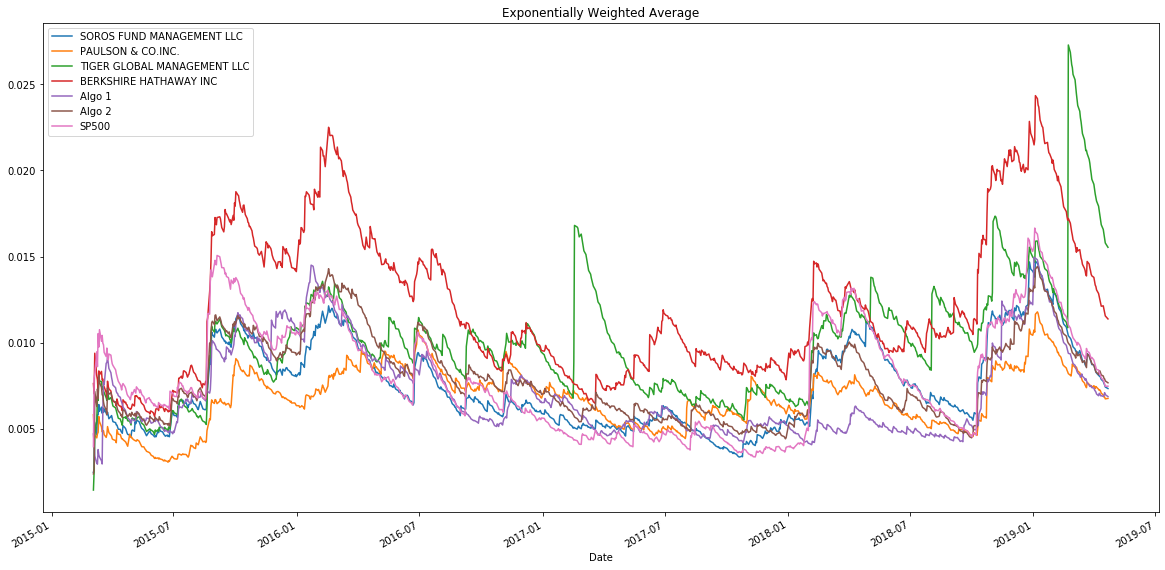

In [24]:
all_returns_df.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [25]:
# Annualzied Sharpe Ratios
annualized_sharpe_ratios = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))
annualized_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

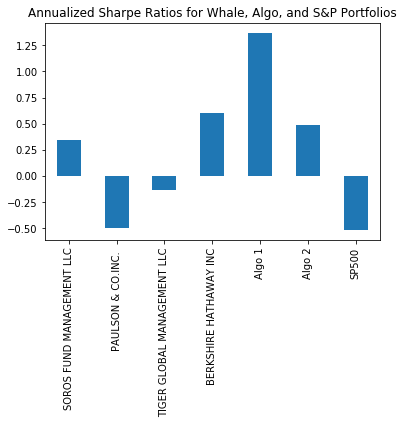

In [26]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot.bar(title='Annualized Sharpe Ratios for Whale, Algo, and S&P Portfolios')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read Apply stock
aapl_csv = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
    
    
# Read Costco stock
cost_csv = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)    


# Read Google stock
goog_csv = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
# goog = goog.sort_index()


# # Concatenate all stocks into a single DataFrame by rows
combined_df = pd.concat([aapl_df, cost_df, goog_df], axis=0, join='inner')
combined_df.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [28]:
# Reset the index
combined_df.reset_index()

,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75
...,...,...,...
745,2018-05-17,GOOG,1078.59
746,2018-05-16,GOOG,1081.77
747,2018-05-15,GOOG,1079.23
748,2018-05-14,GOOG,1100.20


In [29]:
# Pivot so that each column of prices represents a unique symbol
combined_df = combined_df.pivot_table(values='NOCP', index='Trade DATE', columns='Symbol')
combined_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [30]:
# Check Nulls
combined_df.isnull().sum()

Symbol
AAPL    0
COST    0
GOOG    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [31]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

daily_returns = combined_df.pct_change().dropna()
weighted_returns = daily_returns.dot(weights)

# Same as below:
# daily_returns = my_portfolio.pct_change()
# daily_returns.dropna(inplace=True)

weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [32]:
all_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [33]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_df['Custom'] = weighted_returns
all_returns_df.dropna(inplace=True)
all_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292


In [34]:
all_returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom
Date,,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.001217


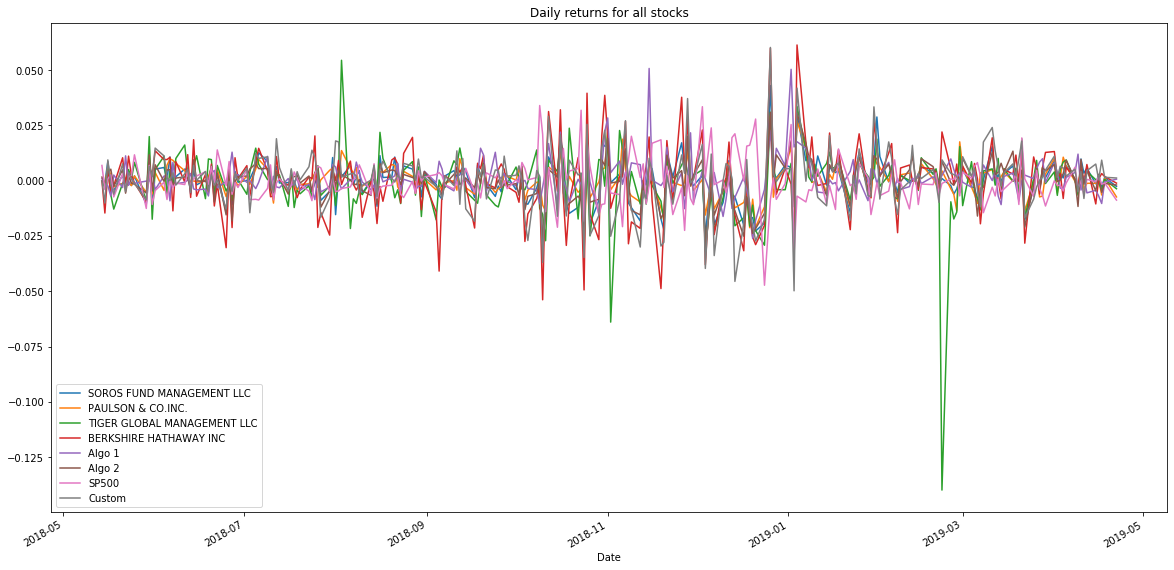

In [35]:
all_returns_df.plot(figsize=(20, 10), title="Daily returns for all stocks")

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [36]:
# Risk
volatility = all_returns_df.std() * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
SP500                          0.152469
Custom                         0.211627
dtype: float64

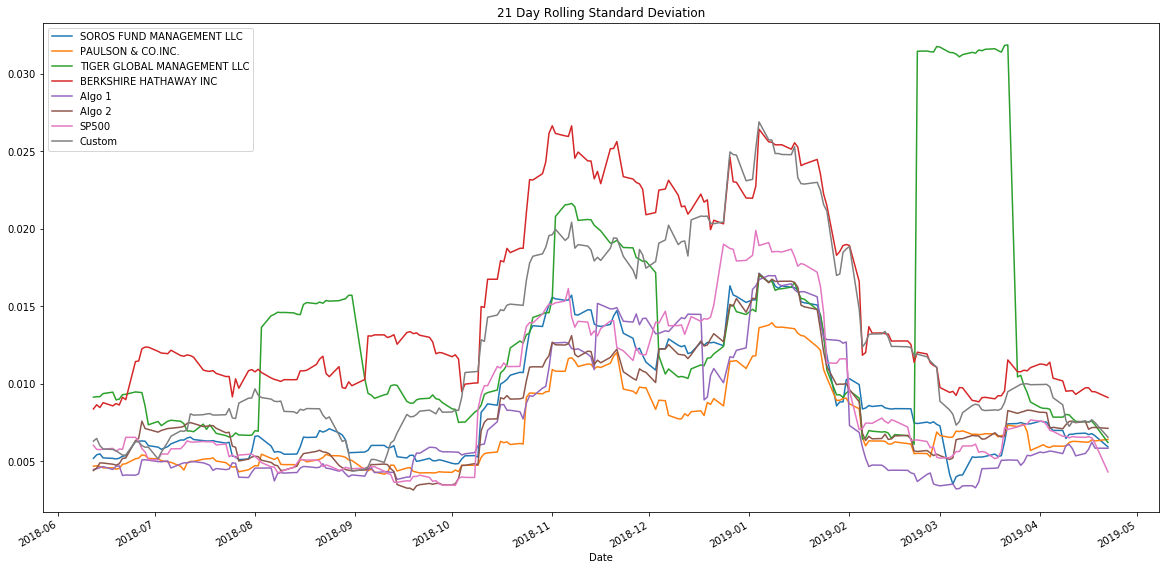

In [37]:
# Rolling
all_returns_df.rolling(window=21).std().plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

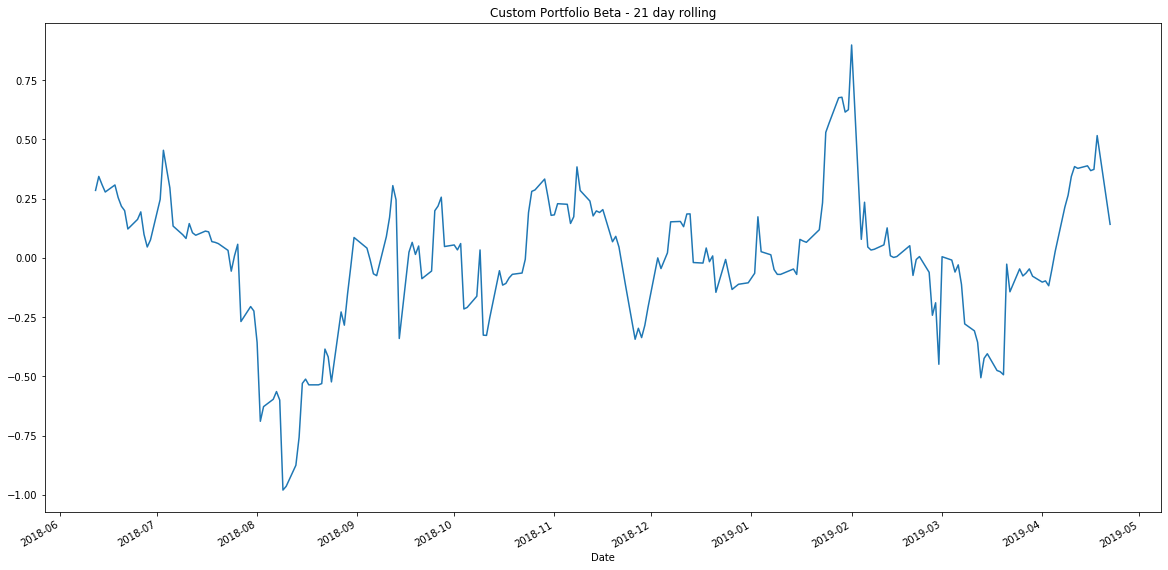

In [38]:
# Beta
cov = all_returns_df['Custom'].rolling(window=21).cov(all_returns_df['SP500'])
var = all_returns_df['SP500'].rolling(window=21).var()
beta = cov/var
beta.plot(figsize=(20,10), title='Custom Portfolio Beta - 21 day rolling')

In [39]:
# Annualzied Sharpe Ratios
sharpe_ratios = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
SP500                         -0.427676
Custom                         0.876152
dtype: float64

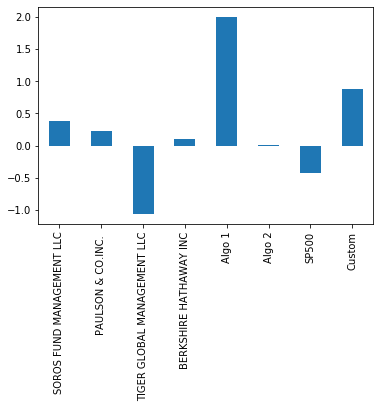

In [40]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

## Include correlation analysis to determine which stocks (if any) are correlated

In [41]:
correlation = all_returns_df.corr()
correlation.style.background_gradient(cmap="PuBu") 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.732548
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739020
SP500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005603
Custom,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000


# My Portfolios

In [42]:
# Read all my portfolios from csv files
JD_df = pd.read_csv(Path('Resources/JD.csv'), index_col='Date', infer_datetime_format=True, parse_dates=True)
MU_df = pd.read_csv(Path('Resources/MU.csv'), index_col='Date', infer_datetime_format=True, parse_dates=True)
CGC_df = pd.read_csv(Path('Resources/CGC.csv'), index_col='Date', infer_datetime_format=True, parse_dates=True)
C_df = pd.read_csv(Path('Resources/C.csv'), index_col='Date', infer_datetime_format=True, parse_dates=True)
IIPR_df = pd.read_csv(Path('Resources/IIPR.csv'), index_col='Date', infer_datetime_format=True, parse_dates=True)
SP500_df = pd.read_csv(Path('Resources/SP500.csv'), index_col='Date', infer_datetime_format=True, parse_dates=True)

# Concatenate all stocks into a single DataFrame
my_portfolio = pd.concat([JD_df, MU_df, CGC_df, C_df, IIPR_df, SP500_df], axis=1, join='inner')

# Rename columns
my_portfolio.columns = ['JD', 'MU', 'CGC', 'C', 'IIPR', 'SP500']

# Reset the index
my_portfolio.index = my_portfolio.index.normalize()
my_portfolio.head()



,JD,MU,CGC,C,IIPR,SP500
Date,,,,,,
2019-03-15,27.93,39.54,45.89,65.19,80.29,2822.48
2019-03-18,28.14,39.61,45.69,65.93,86.21,2832.94
2019-03-19,28.31,40.37,46.11,65.63,89.87,2832.57
2019-03-20,28.08,40.13,46.87,64.30,88.36,2824.23
2019-03-21,28.76,43.99,46.04,63.91,90.08,2854.88


In [43]:
# Calculate daily returns and drop NA if any
# .dropna() has inplace=True here because it is returning a new df with .pct_change()
all_daily_returns = my_portfolio.pct_change().dropna()

# Same as below:
# daily_returns = my_portfolio.pct_change()
# daily_returns.dropna(inplace=True)

all_daily_returns.head()

,JD,MU,CGC,C,IIPR,SP500
Date,,,,,,
2019-03-18,0.007519,0.001770,-0.004358,0.011351,0.073733,0.003706
2019-03-19,0.006041,0.019187,0.009192,-0.004550,0.042454,-0.000131
2019-03-20,-0.008124,-0.005945,0.016482,-0.020265,-0.016802,-0.002944
2019-03-21,0.024217,0.096187,-0.017709,-0.006065,0.019466,0.010853
2019-03-22,-0.026426,-0.053876,-0.036056,-0.045846,-0.025866,-0.018975


In [44]:
# Calculate weighted portfolio returns
# Portfolio returns each day combining all tickers 
weights = [1/5, 1/5 , 1/10, 2/5, 1/10, 0]
weighted_returns = all_daily_returns.dot(weights)
weighted_returns.head()

Date
2019-03-18    0.013336
2019-03-19    0.008390
2019-03-20   -0.010952
2019-03-21    0.021830
2019-03-22   -0.040591
dtype: float64

In [45]:
# Make a copy of all_daily_returns
all_portfolios = all_daily_returns.copy()
# Add weighted return to all_daily_returns
all_portfolios['weighted'] = weighted_returns
all_portfolios.head()

,JD,MU,CGC,C,IIPR,SP500,weighted
Date,,,,,,,
2019-03-18,0.007519,0.001770,-0.004358,0.011351,0.073733,0.003706,0.013336
2019-03-19,0.006041,0.019187,0.009192,-0.004550,0.042454,-0.000131,0.008390
2019-03-20,-0.008124,-0.005945,0.016482,-0.020265,-0.016802,-0.002944,-0.010952
2019-03-21,0.024217,0.096187,-0.017709,-0.006065,0.019466,0.010853,0.021830
2019-03-22,-0.026426,-0.053876,-0.036056,-0.045846,-0.025866,-0.018975,-0.040591


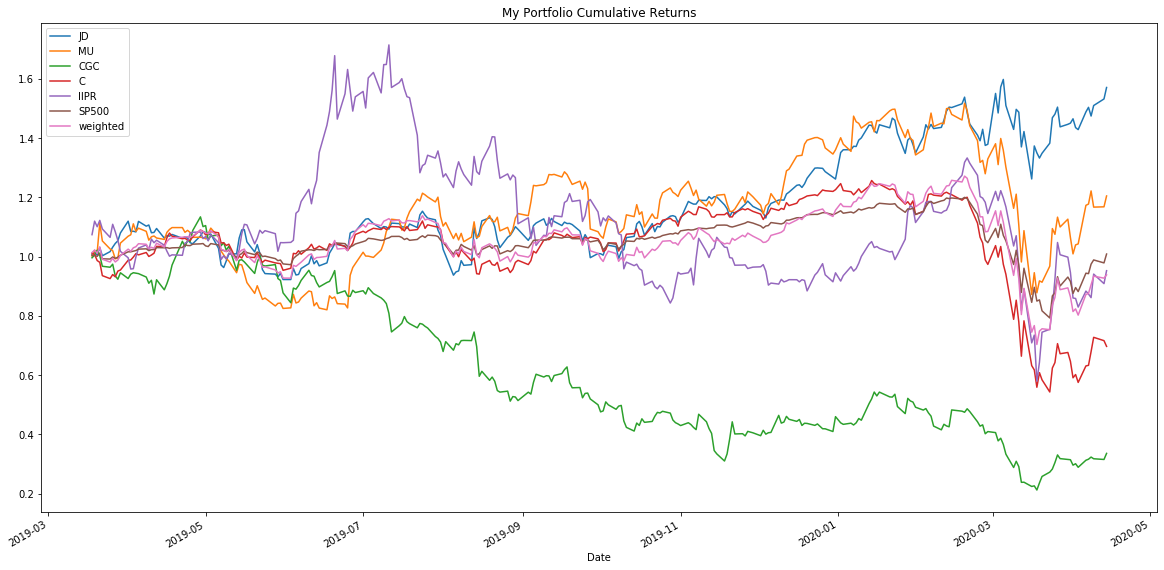

In [46]:
# Cumulative return
cumulative_returns = (1 + all_portfolios).cumprod()
cumulative_returns.plot(figsize=(20,10), title='My Portfolio Cumulative Returns')

In [47]:
# Annualized standard deviation for each stock from 2019-3 to 2020-4 daily 
all_portfolios.std() * np.sqrt(252)

JD          0.422770
MU          0.561162
CGC         0.735305
C           0.525938
IIPR        0.721526
SP500       0.306203
weighted    0.436996
dtype: float64

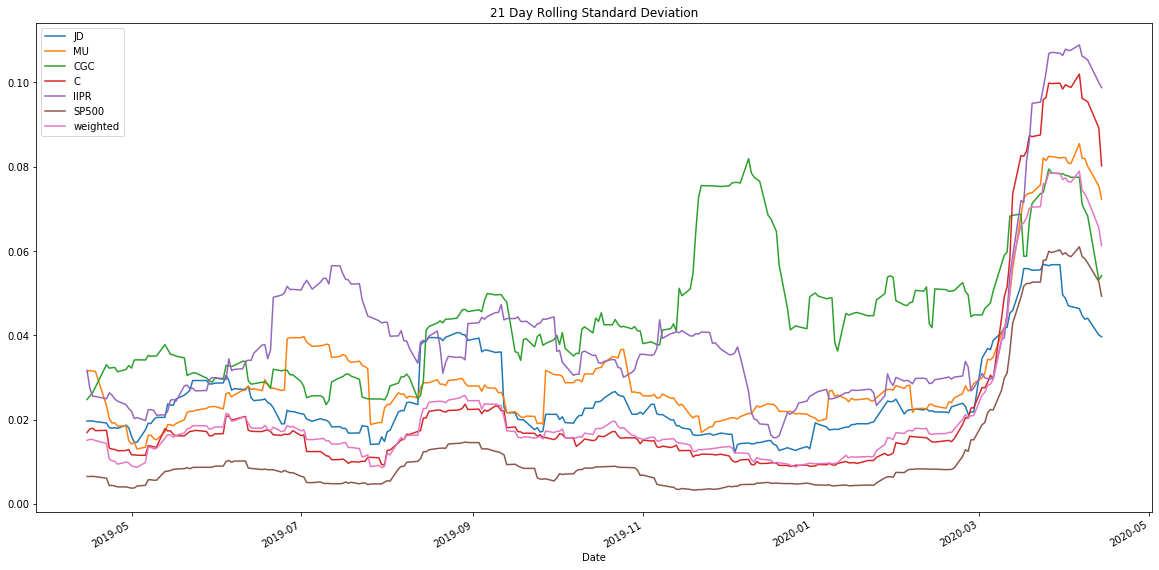

In [48]:
# Rolling
all_portfolios.rolling(window=21).std().plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

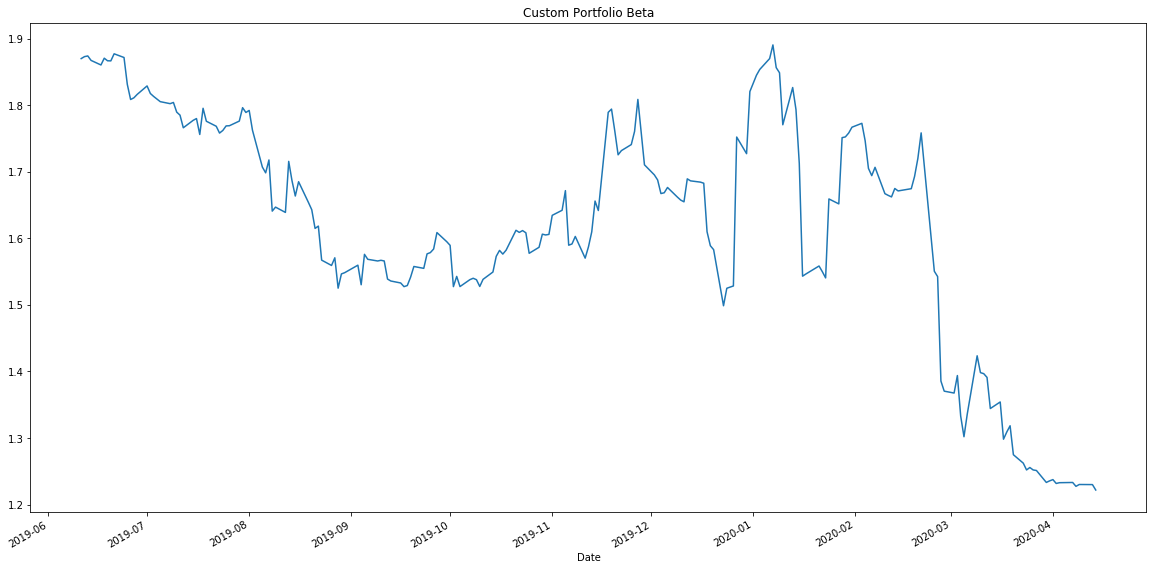

In [49]:
# Beta
covariance = all_portfolios["weighted"].rolling(window=60).cov(all_portfolios["SP500"])
variance = all_portfolios["SP500"].rolling(60).var()
(covariance / variance).plot(figsize=(20, 10), title="Custom Portfolio Beta")

In [50]:
# Annualzied Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

JD          1.199056
MU          0.589679
CGC        -1.006559
C          -0.369263
IIPR        0.305678
SP500       0.179138
weighted    0.086786
dtype: float64

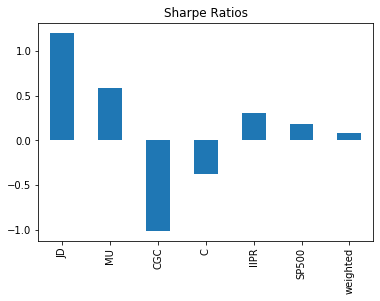

In [51]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")